#step0 데이터 불러오기



*   RAD : radial 고속도로와의 접근성 지수
*   TAX : 10000달러당 재산세



In [1]:
import pandas as pd
import numpy as np

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
src_path = 'https://codepresso-online-platform-public.s3.ap-northeast-2.amazonaws.com/learning-resourse/python_da/kaggle_boston_price.csv'
df = pd.read_csv(src_path)

In [3]:
df.head(3)

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03


In [4]:
sample_df = df[['RAD', 'TAX']]
sample_df.head(3)

,RAD,TAX
0,1,296
1,2,242
2,2,242


#step1 평균과 분산 및 표준편차를 이용한 분석

기술통계분석은 자료의 특징을 파악하는 통계기법이다 이후 추정과 검정을 진행함

평균은 데이터 전체의 중앙 위치를 파악할 수 있는 위치 통계량 중에 하나이고

분산은 데이터 전체의 분포를 파악할 수 있는 변이 통계량 중에 하나이다.

In [18]:
print(type(sample_df.groupby('RAD')))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [24]:
#평균
sample_df.groupby('RAD').mean()

,TAX
RAD,
1,291.450000
2,260.666667
3,246.078947
4,335.981818
5,331.843478
6,372.884615
7,304.411765
8,301.250000
24,666.000000


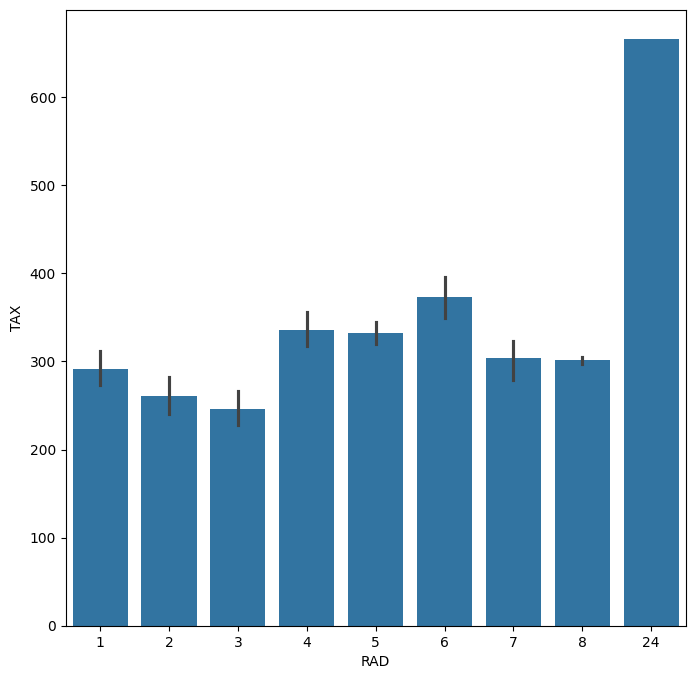

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.barplot(x='RAD', y='TAX', data=sample_df, ax=ax)
plt.show()

위의 그래프에서 막대의 중간에 있는 값은 표준 편차를 나타낸 것이다. RAD=24에서 오차가 0으로 나타나는 이유는 RAD=24인 데이터는 모두 TAX값이 동일하기 때문이다. 이는 아래의 코드에서 발견할 수 있다.

In [26]:
sample_df.loc[df['RAD']==24]

,RAD,TAX
356,24,666
357,24,666
358,24,666
359,24,666
360,24,666
...,...,...
483,24,666
484,24,666
485,24,666
486,24,666


In [27]:
#분산
sample_df.groupby('RAD').var()

,TAX
RAD,
1,1938.471053
2,3095.014493
3,4059.966572
4,10379.430859
5,4657.536690
6,3403.786154
7,2220.507353
8,103.500000
24,0.000000


In [28]:
#표준편차
sample_df.groupby('RAD').std()

,TAX
RAD,
1,44.028071
2,55.632854
3,63.717867
4,101.879492
5,68.246148
6,58.341976
7,47.122260
8,10.173495
24,0.000000



*   RAD =24인 데이터는 위에서 언급한 것처럼 모두 값이 동일하므로 var = 0이 된다.

*  RAD=4인 데이터에서는 outlier가 있을 가능성이 높다



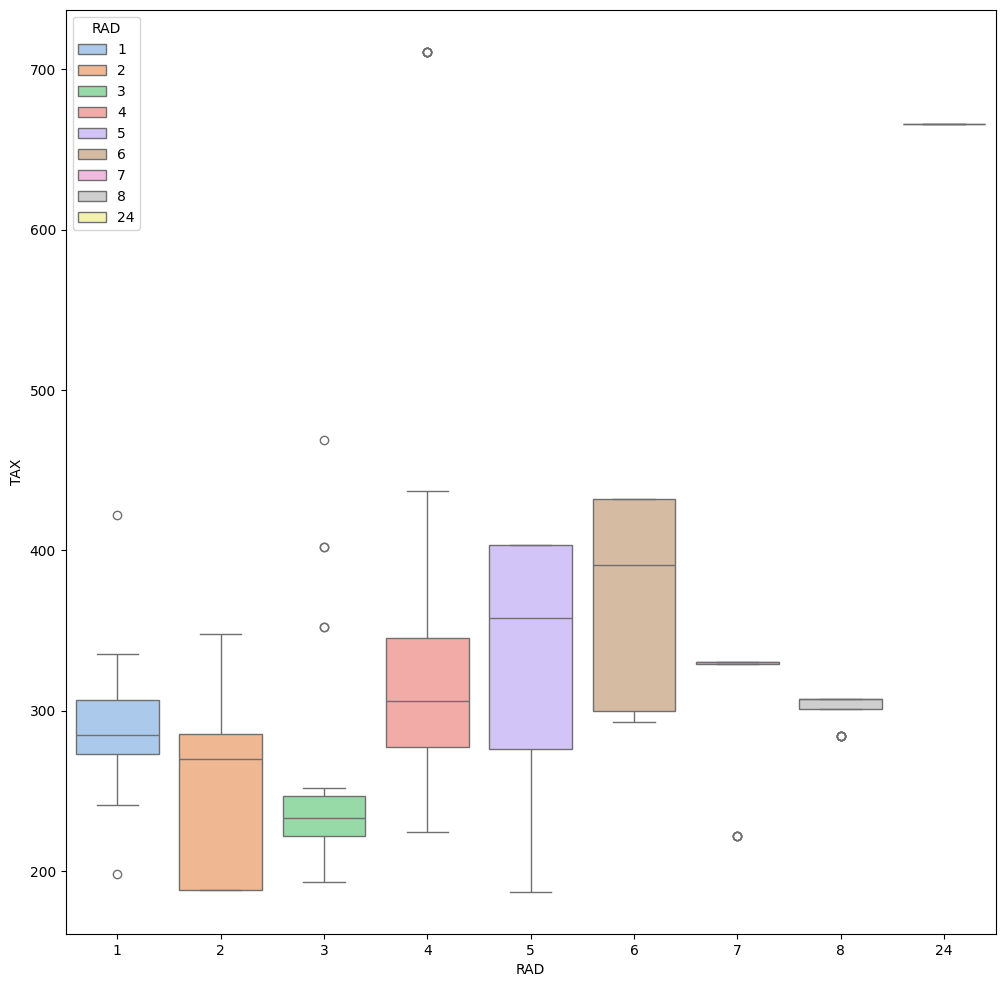

In [38]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
palette=sns.color_palette("pastel",9)
sns.boxplot(x='RAD', y='TAX',hue='RAD', data=sample_df, ax=ax, palette=palette)
plt.show()

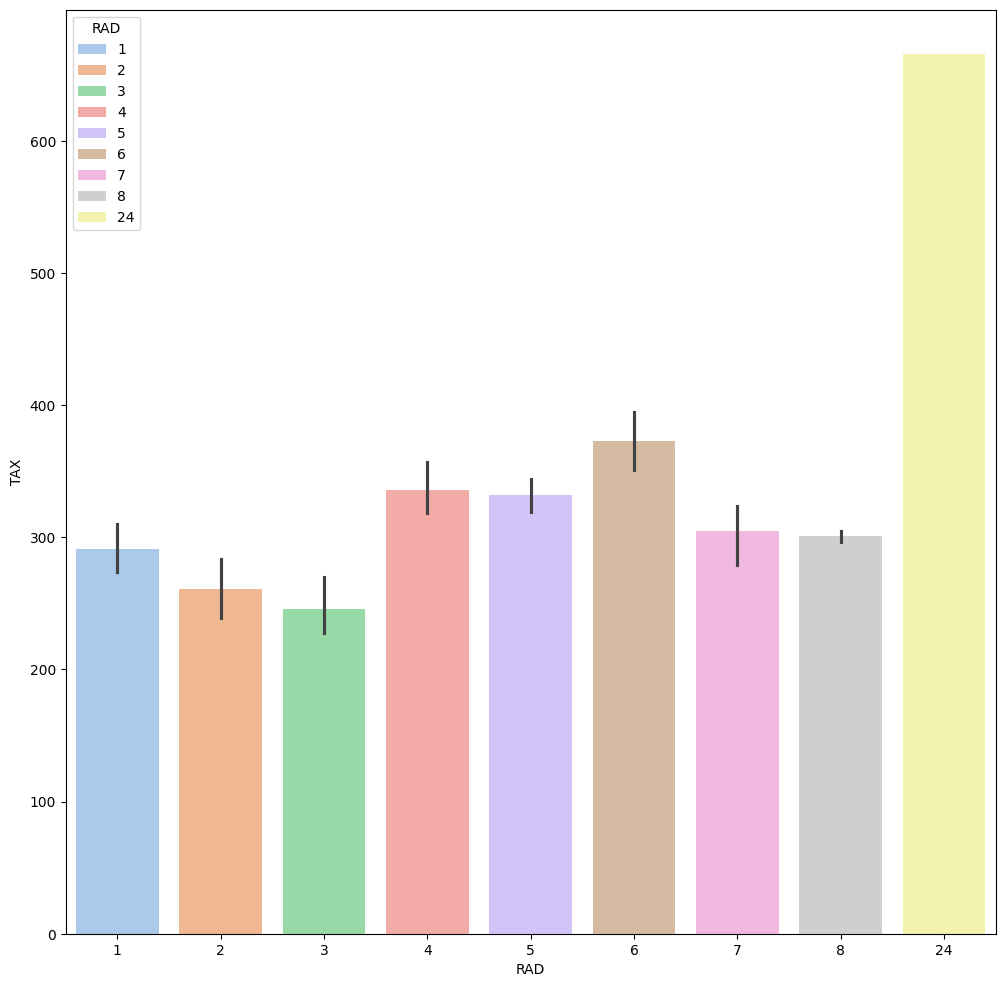

In [37]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca()
palette=sns.color_palette("pastel",9)
sns.barplot(x='RAD', y='TAX',hue='RAD', data=sample_df, ax=ax, palette=palette)
plt.show()

#step2 왜도와 첨도(모형통계량)

In [39]:
# 평균
print("mean : ",df['RM'].mean())

# 왜도
print("skew : ",df['RM'].skew())

# 첨도
print("kurt : ",df['RM'].kurt())

mean :  6.284634387351779
skew :  0.40361213328874385
kurt :  1.8915003664993404


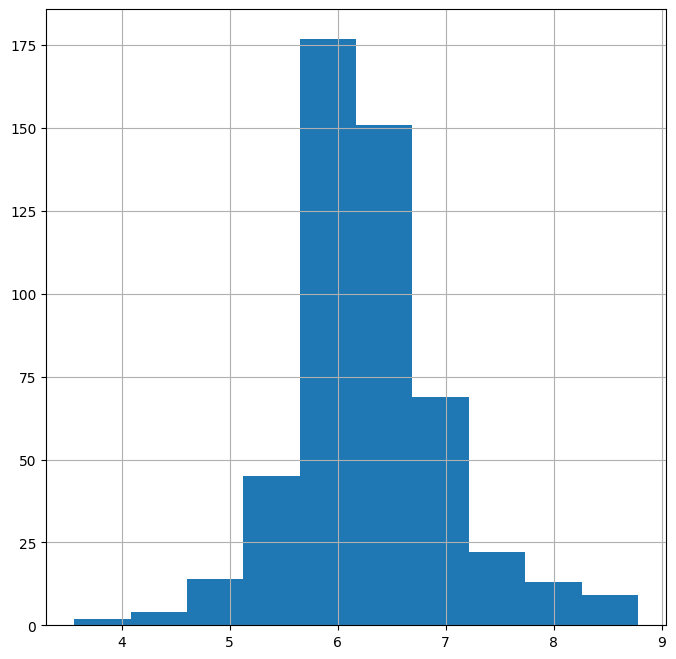

In [40]:
fig = plt.figure(figsize=(8,8))
ax=fig.gca()
df['RM'].hist(bins=10, ax=ax)
plt.show()

<Axes: xlabel='RM', ylabel='Count'>

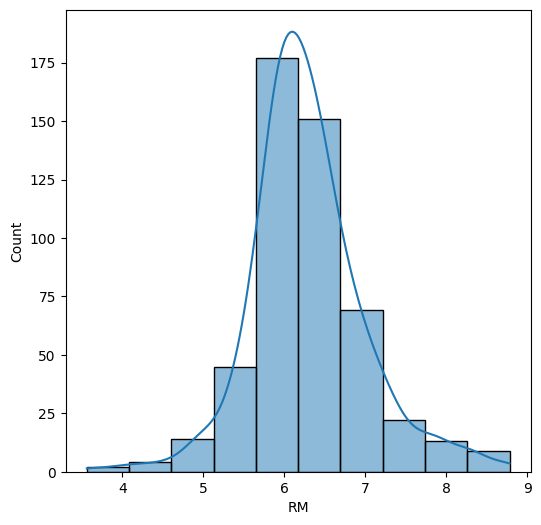

In [41]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.histplot(x='RM', kde =True, data = df, bins =10, ax=ax)

#Step3 중앙값, 최빈값, 사분위수

중앙값, 최빈값, 사분위수 all -> 위치통계량(점)

but 사분위수 중 Q3-Q1 인 IQR은 -> 변이통계량(범위)

In [42]:
df['TAX'].describe()

,TAX
count,506.000000
mean,408.237154
std,168.537116
min,187.000000
25%,279.000000
50%,330.000000
75%,666.000000
max,711.000000


In [48]:
df['TAX'].value_counts().sort_values(ascending=False)

,count
TAX,
666,132
307,40
403,30
437,15
304,14
...,...
422,1
280,1
351,1


In [44]:
df['TAX'].value_counts().idxmax()

666

In [50]:
#Q1
print(np.percentile(df['TAX'],25))

#Q2
print(np.percentile(df['TAX'],50))

#Q3
print(np.percentile(df['TAX'],75))

279.0
330.0
666.0
